<a href="https://colab.research.google.com/github/Rustam86/Home-works-HSE/blob/main/Stat_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Настраиваем окружение
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
# Загружаем данные для анализа
!gdown 1ee6cNaLirxE0raWdaSZAUt0ndRWPo0Ka
!gdown 1IahyoNPhlSLWMP-cMCvnGW1zcJAAkQK6

In [ ]:
# Альтернативный способ загрузить данные
!wget -O "/content/eukarya.csv" "https://drive.google.com/uc?export=download&id=1ee6cNaLirxE0raWdaSZAUt0ndRWPo0Ka"
!wget -O "/content/bacteria.csv" "https://drive.google.com/uc?export=download&id=1IahyoNPhlSLWMP-cMCvnGW1zcJAAkQK6"

In [77]:
# Подготавливаем данные для анализа
bacteria = pd.read_csv("/content/bacteria.csv")
eucarya = pd.read_csv("/content/eukarya.csv")
bact_bacsu_lengths = bacteria["Length"] # Среди прокариот была выбрана Bacillus subtilis
eucarya_cavpo_lengths = eucarya["Length"] # Среди эукариот выбрана Cavia porcellus
bact_bacsu_lengths.dropna(inplace=True)
eucarya_cavpo_lengths.dropna(inplace=True)

In [12]:
x = eucarya_cavpo_lengths
y = bact_bacsu_lengths

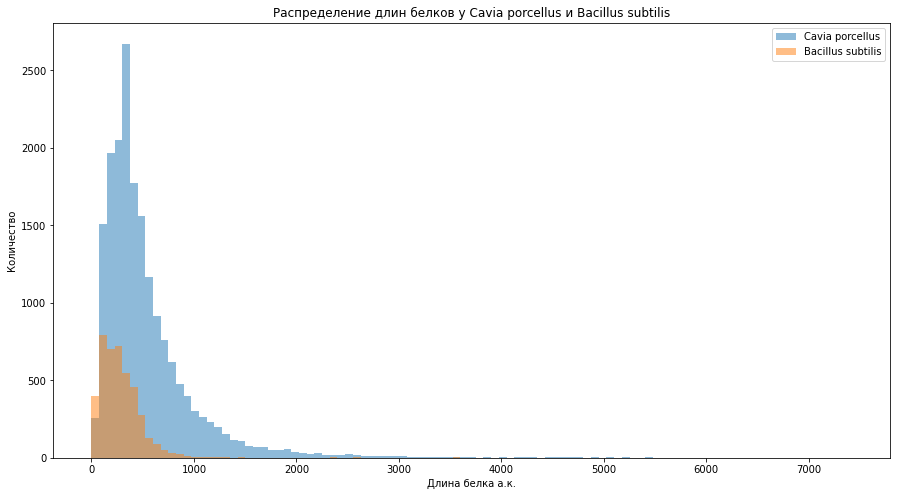

In [56]:
# Строим совместную гистограмму распределений длин белков для C.porcellus и B.subtilis
plt.xlabel('Длина белка а.к.')
plt.ylabel('Количество')
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis')
bins = np.linspace(0, max(x + y), 100)
plt.hist(x, bins, alpha=0.5, label='Cavia porcellus')
plt.hist(y, bins, alpha=0.5, label='Bacillus subtilis')
plt.legend(loc='upper right')
plt.show()

In [32]:
# Оба распределения имеют длинный "хвост" - малочисленные белки большой длины.
# Общее количество белков
print(f"B.subtilis: {len(y)} белков")
print(f"C.porcellus: {len(x)} белков")

B.subtilis: 4260 белков
C.porcellus: 18249 белков


In [49]:
# Оценим количество белков с длиной больше 2000 а.к.
print(f"B.subtilis: {len([i for i in y if i > 2000])} белков, {round(len([i for i in y if i > 2000])/len(y)*100, 2)}% от общего числа")
print(f"C.porcellus: {len([i for i in x if i > 2000])} белков, {round(len([i for i in x if i > 2000])/len(x)*100, 2)}% от общего числа")

B.subtilis: 14 белков, 0.33% от общего числа
C.porcellus: 355 белков, 1.95% от общего числа


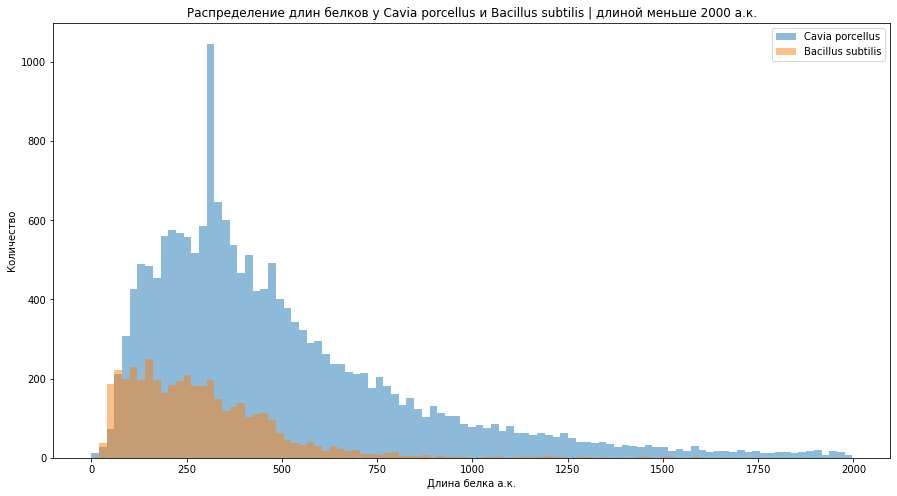

In [55]:
# Построим совместную гистограмму для подмножества белков длиной меньше 2000 а.к.
plt.xlabel('Длина белка а.к.')
plt.ylabel('Количество')
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis | длиной меньше 2000 а.к.')
bins = np.linspace(0, max([i for i in x if i < 2000]), 100)
plt.hist([i for i in x if i < 2000], bins, alpha=0.5, label='Cavia porcellus')
plt.hist([i for i in y if i < 2000], bins, alpha=0.5, label='Bacillus subtilis')
plt.legend(loc='upper right')
plt.show()

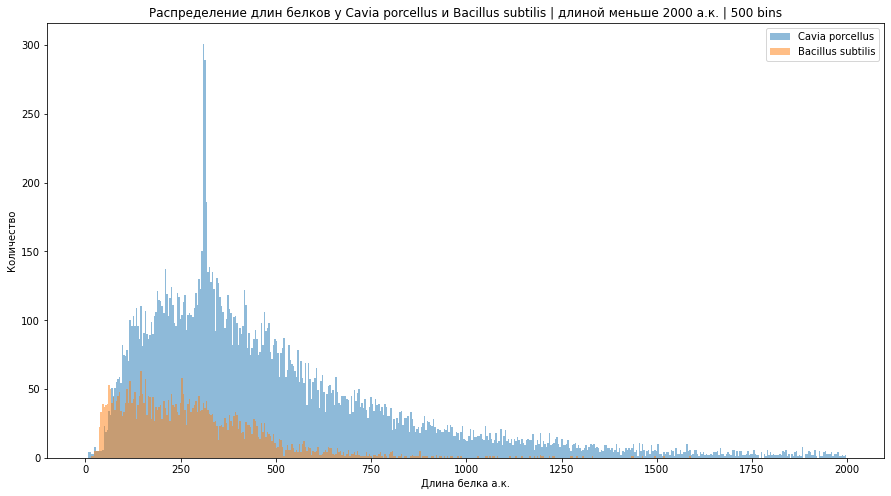

In [78]:
# Увеличим количество бинов для совместной гистограммы подмножества белков длиной меньше 2000 а.к. Было 100, сделаем 500
plt.xlabel('Длина белка а.к.')
plt.ylabel('Количество')
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis | длиной меньше 2000 а.к. | 500 bins')
bins = np.linspace(0, max([i for i in x if i < 2000]), 500)
plt.hist([i for i in x if i < 2000], bins, alpha=0.5, label='Cavia porcellus')
plt.hist([i for i in y if i < 2000], bins, alpha=0.5, label='Bacillus subtilis')
plt.legend(loc='upper right')
plt.show()

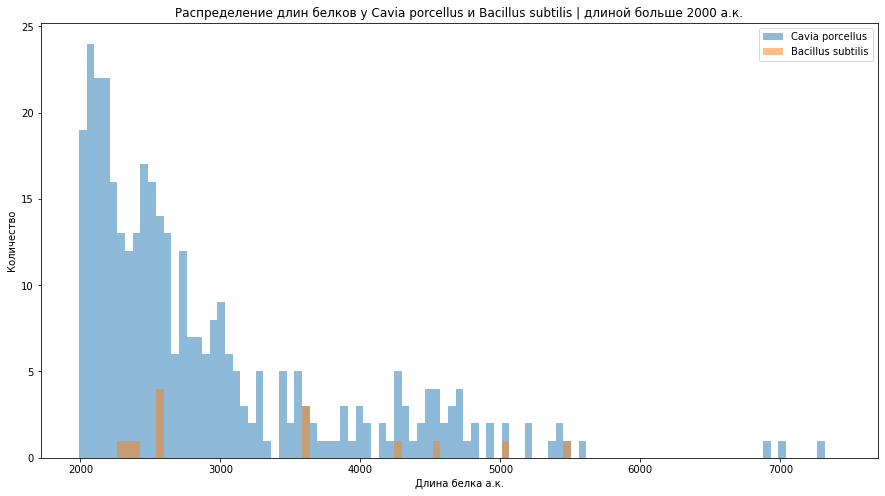

In [62]:
# Построим совместную гистограмму для подмножества оставшихся белков длиной больше 2000 а.к.
# В целом полученная гистограмма не показывает чего-то неожиданного, с увеличением длинны белка, количество таких белков уменьшается
plt.xlabel('Длина белка а.к.')
plt.ylabel('Количество')
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis | длиной больше 2000 а.к.')
bins = np.linspace(1990, max(x + y), 100)
plt.hist([i for i in x if i > 2000], bins, alpha=0.5, label='Cavia porcellus')
plt.hist([i for i in y if i > 2000], bins, alpha=0.5, label='Bacillus subtilis')
plt.legend(loc='upper right')
plt.show()

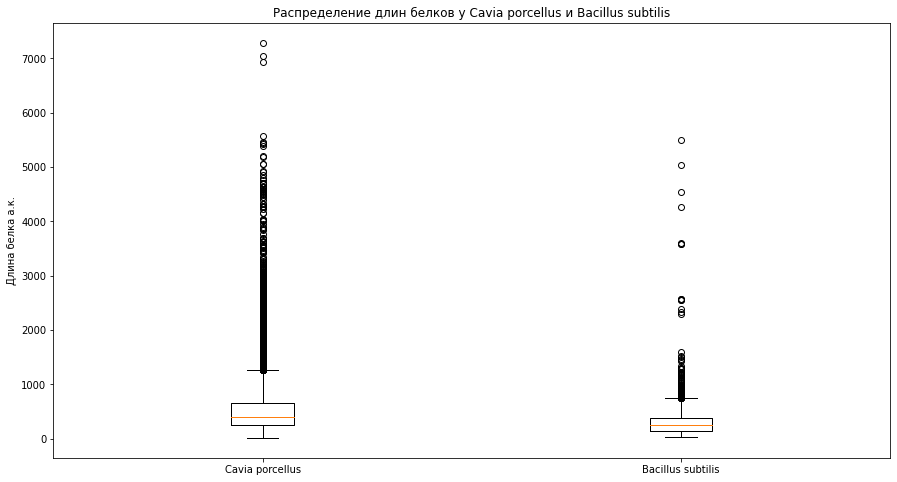

In [63]:
# Построим диаграмму "ящик с усами"
# На данной диаграмме выбросы еще нагляднее
# Диаграмма построена по стандартным правилам
# Прямоугольник простирается от первого квартиля (Q1) до третьего квартиля (Q3) данных с линией в медиане. 
# Усы выступают из прямоугольника до точки данных максимальной величины, но не более чем на 1,5 межквартильного интервала.
# Оставшиеся точки помечены кружками
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis')
plt.ylabel('Длина белка а.к.')
plt.xticks([1, 2], ['Cavia porcellus', 'Bacillus subtilis'])
plt.xticks([])
plt.boxplot([x, y])
plt.show();

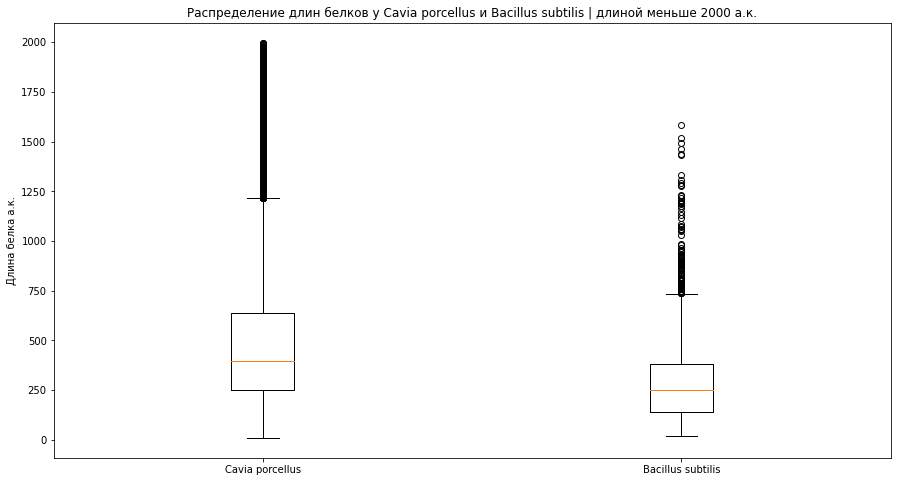

In [79]:
# Для наглядности сравнения опять отбросим белки длиной больше 2000 а.к.
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis | длиной меньше 2000 а.к.')
plt.ylabel('Длина белка а.к.')
plt.xticks([1, 2], ['Cavia porcellus', 'Bacillus subtilis'])
plt.xticks([])
plt.boxplot([[i for i in x if i < 2000], [i for i in y if i < 2000]])
plt.show();

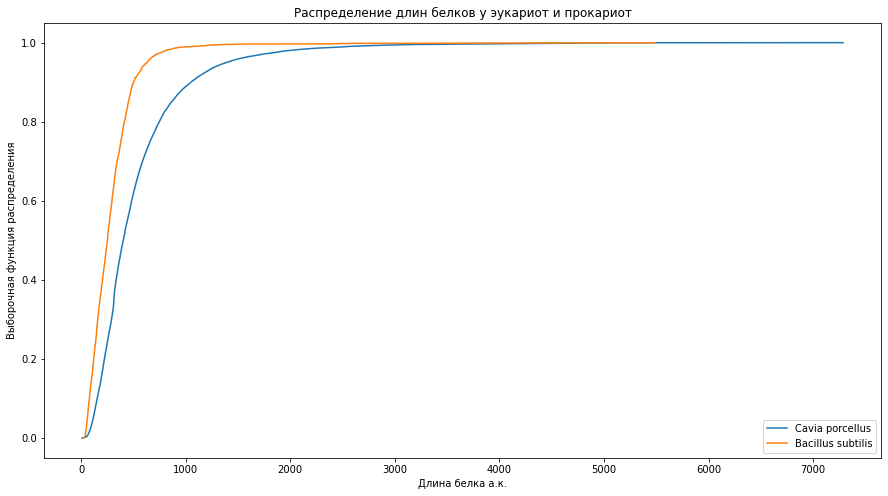

In [67]:
# Постром график выборочной функции распределения для длин белков Cavia porcellus и Bacillus subtilis
plt.xlabel('Длина белка а.к.')
plt.ylabel('Выборочная функция распределения')
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis')

plt.plot(np.sort(x), np.linspace(0, 1, len(x), endpoint=False), label='Cavia porcellus')
plt.plot(np.sort(y), np.linspace(0, 1, len(y), endpoint=False), label='Bacillus subtilis')
plt.legend(loc='lower right')
plt.show()

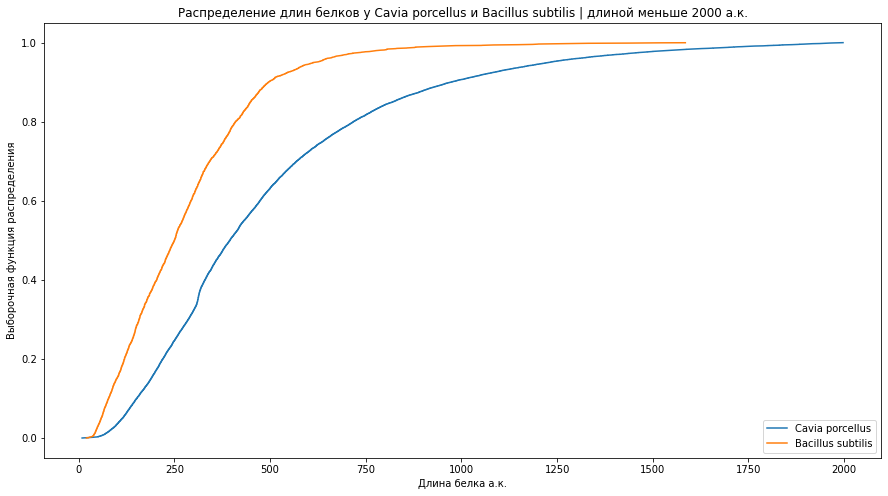

In [68]:
# Постром график выборочной функции распределения для длин белков < 2000 Cavia porcellus и Bacillus subtilis
plt.xlabel('Длина белка а.к.')
plt.ylabel('Выборочная функция распределения')
plt.title('Распределение длин белков у Cavia porcellus и Bacillus subtilis | длиной меньше 2000 а.к.')

plt.plot(np.sort([i for i in x if i < 2000]), np.linspace(0, 1, len([i for i in x if i < 2000]), endpoint=False), label='Cavia porcellus')
plt.plot(np.sort([i for i in y if i < 2000]), np.linspace(0, 1, len([i for i in y if i < 2000]), endpoint=False), label='Bacillus subtilis')
plt.legend(loc='lower right')
plt.show()